In [108]:
import spacy
import timeit
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from collections import Counter
from lxml import etree
from glob import glob
from unicodedata import normalize
from sklearn.svm import SVR

In [109]:
%matplotlib inline

In [110]:
shannon_archive_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_shannon_archive_df.csv')
shannon_canon_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_shannon_canon_df.csv')
type_token_archive_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_type_token_archive_df.csv')
type_token_canon_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_type_token_canon_df.csv')

In [111]:
del shannon_archive_df['19XX_Radiguet-Raymond_Le-Bal-du-comte-d-Orgel']
del shannon_archive_df['19XX_Delly_Contes']
del shannon_canon_df['1978_Perec-Georges_Je-me-souviens']

In [112]:
del shannon_canon_df['1922_Aragon-Louis_Les-aventures-de-Telemaque']

In [113]:
del shannon_archive_df['1869_L-Epine-Ernest_Voyage-autour-du-grand-monde']
del shannon_archive_df['1870_Ponson-du-Terrail-Pierre_Rocambole-La-Corde-du-pendu-Tome-II--L-Homme-gris']
del shannon_archive_df['2004_Bouraoui-Nina_Poupee-Bella']

In [114]:
del type_token_archive_df['19XX_Radiguet-Raymond_Le-Bal-du-comte-d-Orgel']
del type_token_archive_df['19XX_Delly_Contes']
del type_token_canon_df['1978_Perec-Georges_Je-me-souviens']

In [115]:
del type_token_archive_df['1884_Gouraud-Julie_La-petite-maîtresse-de-maison']
del type_token_archive_df['1903_Leblanc-Maurice_Un-gentleman']
del type_token_archive_df['1909_Dhanys-Marcel_La-fille-de-Racine']

In [116]:
del type_token_canon_df['1922_Aragon-Louis_Les-aventures-de-Telemaque']

In [117]:
del type_token_canon_df['1965_Le-Clezio-Jean-Marie-Gustave_La-fievre']

In [90]:
annee_canon = ['1811', '1816', '1822', '1823', '1825', '1827', '1827', '1829', '1829', '1829', '1830', '1830', '1830', '1831', '1831', '1831', '1831', '1831', '1832', '1832', '1832', '1832', '1833', '1833', '1833', '1833', '1833', '1834', '1834', '1834', '1834', '1834', '1834', '1835', '1836', '1836', '1837', '1837', '1837', '1837', '1838', '1838', '1838', '1839', '1839', '1839', '1839', '1839', '1840', '1840', '1840', '1840', '1840', '1841', '1841', '1841', '1841', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1848', '1848', '1848', '1848', '1848', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1851', '1851', '1851', '1851', '1851', '1851', '1851', '1851', '1852', '1852', '1852', '1853', '1853', '1853', '1853', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1856', '1856', '1856', '1856', '1857', '1857', '1857', '1857', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1859', '1859', '1859', '1859', '1860', '1860', '1860', '1860', '1861', '1861', '1862', '1862', '1862', '1862', '1862', '1863', '1863', '1863', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1865', '1865', '1865', '1865', '1865', '1866', '1866', '1866', '1867', '1867', '1868', '1868', '1869', '1869', '1869', '1869', '1870', '1870', '1870', '1871', '1871', '1871', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1873', '1873', '1873', '1873', '1873', '1873', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1875', '1875', '1875', '1875', '1876', '1876', '1876', '1876', '1876', '1877', '1877', '1877', '1877', '1877', '1877', '1878', '1878', '1878', '1878', '1879', '1879', '1879', '1879', '1880', '1880', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1883', '1883', '1883', '1883', '1883', '1883', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1889', '1889', '1889', '1889', '1889', '1889', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1891', '1891', '1891', '1891', '1891', '1891', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1893', '1893', '1893', '1893', '1893', '1893', '1894', '1894', '1894', '1894', '1895', '1895', '1895', '1895', '1895', '1895', '1896', '1896', '1896', '1896', '1896', '1896', '1896', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1898', '1898', '1898', '1898', '1898', '1899', '1899', '1899', '1899', '1899', '1900', '1900', '1900', '1900', '1900', '1900', '1901', '1901', '1901', '1902', '1902', '1903', '1903', '1903', '1903', '1903', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1905', '1905', '1905', '1905', '1905', '1906', '1906', '1906', '1907', '1907', '1907', '1908', '1908', '1908', '1908', '1908', '1908', '1909', '1909', '1910', '1910', '1911', '1911', '1911', '1911', '1911', '1912', '1912', '1912', '1912', '1913', '1913', '1913', '1913', '1913', '1913', '1914', '1914', '1914', '1914', '1915', '1916', '1917', '1917', '1918', '1918', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1924', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1928', '1928', '1928', '1928', '1928', '1929', '1929', '1929', '1929', '1929', '1929', '1930', '1930', '1930', '1930', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1933', '1933', '1933', '1933', '1933', '1933', '1933', '1934', '1934', '1934', '1934', '1934', '1934', '1935', '1935', '1935', '1935', '1936', '1936', '1936', '1936', '1936', '1936', '1936', '1937', '1937', '1937', '1937', '1938', '1938', '1938', '1938', '1938', '1939', '1939', '1939', '1939', '1939', '1939', '1940', '1941', '1941', '1941', '1941', '1941', '1941', '1941', '1942', '1942', '1942', '1942', '1942', '1942', '1942', '1943', '1943', '1943', '1943', '1943', '1944', '1944', '1944', '1944', '1944', '1945', '1946', '1947', '1947', '1947', '1947', '1947', '1947', '1947', '1947', '1948', '1948', '1948', '1949', '1949', '1949', '1949', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1952', '1952', '1953', '1953', '1953', '1953', '1953', '1953', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1955', '1955', '1955', '1955', '1956', '1956', '1956', '1957', '1957', '1957', '1958', '1958', '1958', '1958', '1958', '1958', '1959', '1959', '1959', '1959', '1960', '1960', '1960', '1960', '1960', '1961', '1961', '1962', '1962', '1963', '1963', '1963', '1963', '1963', '1963', '1964', '1964', '1964', '1964', '1965', '1965', '1965', '1966', '1966', '1966', '1966', '1967', '1967', '1967', '1967', '1968', '1968', '1968', '1968', '1968', '1968', '1968', '1969', '1969', '1969', '1969', '1970', '1970', '1970', '1970', '1970', '1970', '1971', '1971', '1971', '1971', '1971', '1971', '1972', '1972', '1972', '1972', '1972', '1972', '1973', '1973', '1974', '1974', '1975', '1975', '1975', '1975', '1975', '1976', '1976', '1976', '1977', '1977', '1977', '1977', '1978', '1978', '1978', '1978', '1978', '1979', '1979', '1979', '1980', '1980', '1981', '1981', '1981', '1981', '1982', '1982', '1982', '1982', '1983', '1983', '1983', '1983', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1985', '1985', '1985', '1985', '1985', '1986', '1986', '1986', '1986', '1986', '1986', '1986', '1987', '1987', '1987', '1987', '1987', '1987', '1987', '1987', '1988', '1988', '1988', '1989', '1989', '1989', '1989', '1989', '1989', '1990', '1990', '1990', '1990', '1990', '1990', '1991', '1991', '1991', '1991', '1991', '1991', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1998', '1998', '1998', '1998', '1998', '1998', '1998', '1998', '1999', '1999', '1999', '1999', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2018']
annee_archive = ['1812', '1815', '1815', '1816', '1816', '1816', '1816', '1816', '1816', '1817', '1817', '1817', '1819', '1819', '1819', '1821', '1822', '1822', '1824', '1824', '1824', '1824', '1825', '1826', '1826', '1826', '1826', '1827', '1827', '1827', '1827', '1827', '1827', '1828', '1829', '1829', '1831', '1831', '1831', '1831', '1831', '1831', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1833', '1833', '1833', '1833', '1834', '1834', '1834', '1834', '1834', '1834', '1835', '1835', '1835', '1835', '1836', '1836', '1836', '1836', '1836', '1837', '1837', '1837', '1838', '1838', '1838', '1838', '1838', '1838', '1839', '1839', '1840', '1840', '1840', '1840', '1842', '1842', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1845', '1845', '1845', '1845', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1848', '1848', '1849', '1850', '1850', '1850', '1850', '1850', '1851', '1851', '1851', '1851', '1852', '1852', '1852', '1852', '1852', '1852', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1854', '1854', '1854', '1854', '1854', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1870', '1870', '1870', '1870', '1870', '1870', '1870', '1870', '1871', '1871', '1871', '1871', '1871', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1896', '1896', '1896', '1896', '1896', '1896', '1896', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1900', '1900', '1900', '1900', '1900', '1900', '1900', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1914', '1916', '1916', '1916', '1916', '1916', '1917', '1917', '1917', '1917', '1917', '1917', '1917', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1919', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927', '1928', '1928', '1928', '1928', '1928', '1928', '1928', '1928', '1929', '1929', '1929', '1929', '1929', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1931', '1931', '1931', '1931', '1932', '1932', '1932', '1932', '1932', '1933', '1933', '1933', '1933', '1933', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1935', '1935', '1935', '1935', '1935', '1936', '1936', '1937', '1937', '1938', '1939', '1940', '1941', '1941', '1941', '1942', '1942', '1943', '1943', '1943', '1945', '1945', '1945', '1945', '1945', '1946', '1946', '1946', '1946', '1947', '1947', '1947', '1947', '1947', '1948', '1948', '1948', '1948', '1948', '1948', '1948', '1949', '1949', '1949', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1952', '1952', '1952', '1952', '1952', '1952', '1952', '1952', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1955', '1955', '1955', '1955', '1955', '1955', '1955', '1955', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1958', '1958', '1958', '1958', '1958', '1958', '1958', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1961', '1961', '1961', '1961', '1961', '1961', '1961', '1961', '1962', '1962', '1962', '1962', '1962', '1962', '1963', '1963', '1963', '1963', '1963', '1963', '1964', '1964', '1965', '1965', '1965', '1965', '1965', '1965', '1966', '1966', '1966', '1966', '1967', '1967', '1967', '1967', '1968', '1968', '1968', '1968', '1968', '1968', '1968', '1969', '1969', '1969', '1969', '1969', '1969', '1969', '1970', '1970', '1970', '1970', '1971', '1971', '1971', '1971', '1971', '1971', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1973', '1973', '1973', '1973', '1973', '1973', '1974', '1974', '1974', '1974', '1974', '1974', '1974', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1976', '1976', '1977', '1977', '1977', '1977', '1978', '1978', '1978', '1979', '1979', '1980', '1980', '1980', '1981', '1981', '1981', '1981', '1982', '1982', '1982', '1982', '1982', '1983', '1984', '1984', '1984', '1985', '1985', '1986', '1986', '1987', '1988', '1988', '1989', '1989', '1990', '1991', '1991', '1991', '1991', '1991', '1993', '1993', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1997', '1997', '1997', '1997', '1997', '1998', '1998', '1998', '1998', '1999', '1999', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2009', '2009', '2009', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2019', '2019', '2020', '2020']

In [91]:
data_can_test = shannon_canon_df.mean().to_numpy()
data_can = data_can_test[np.logical_not(np.isnan(data_can_test))]

In [92]:
def clear_data(data):
    for elem in data:
        if elem == 0.:
            data.remove(elem)
    return data

In [93]:
data_can = list(data_can)
data_can = clear_data(data_can)
data_can = np.array(data_can)
data_can

array([5.66946746, 5.30032258, 5.53911765, ..., 5.69487179, 4.97318182,
       6.9124    ])

In [94]:
data_can.reshape(-1, 1)

array([[5.66946746],
       [5.30032258],
       [5.53911765],
       ...,
       [5.69487179],
       [4.97318182],
       [6.9124    ]])

In [95]:
annee_test = np.array(annee_canon).reshape(-1, 1)
annee_test = annee_test.astype('int32')

In [96]:
data_arch_test = shannon_archive_df.mean().to_numpy()
data_arch = data_arch_test[np.logical_not(np.isnan(data_arch_test))]

In [97]:
data_arch = list(data_arch)
data_arch = clear_data(data_arch)
data_arch = np.array(data_arch)
data_arch

array([5.83526316, 6.1453125 , 6.19818182, ..., 4.79042857, 5.0984375 ,
       4.55552632])

In [98]:
data_arch.reshape(-1, 1)

array([[5.83526316],
       [6.1453125 ],
       [6.19818182],
       ...,
       [4.79042857],
       [5.0984375 ],
       [4.55552632]])

In [99]:
annee_arch = np.array(annee_archive).reshape(-1, 1)
annee_arch = annee_arch.astype('int32')

In [100]:
len(annee_arch)

1803

In [101]:
len(data_arch)

1803

In [102]:
len(shannon_archive_df.mean())

1803

In [103]:
len(annee_test)

1154

In [104]:
len(shannon_canon_df.mean())

1154

In [105]:
len(data_can)

1154

In [106]:
svr_poly = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=.1)
#SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
#SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

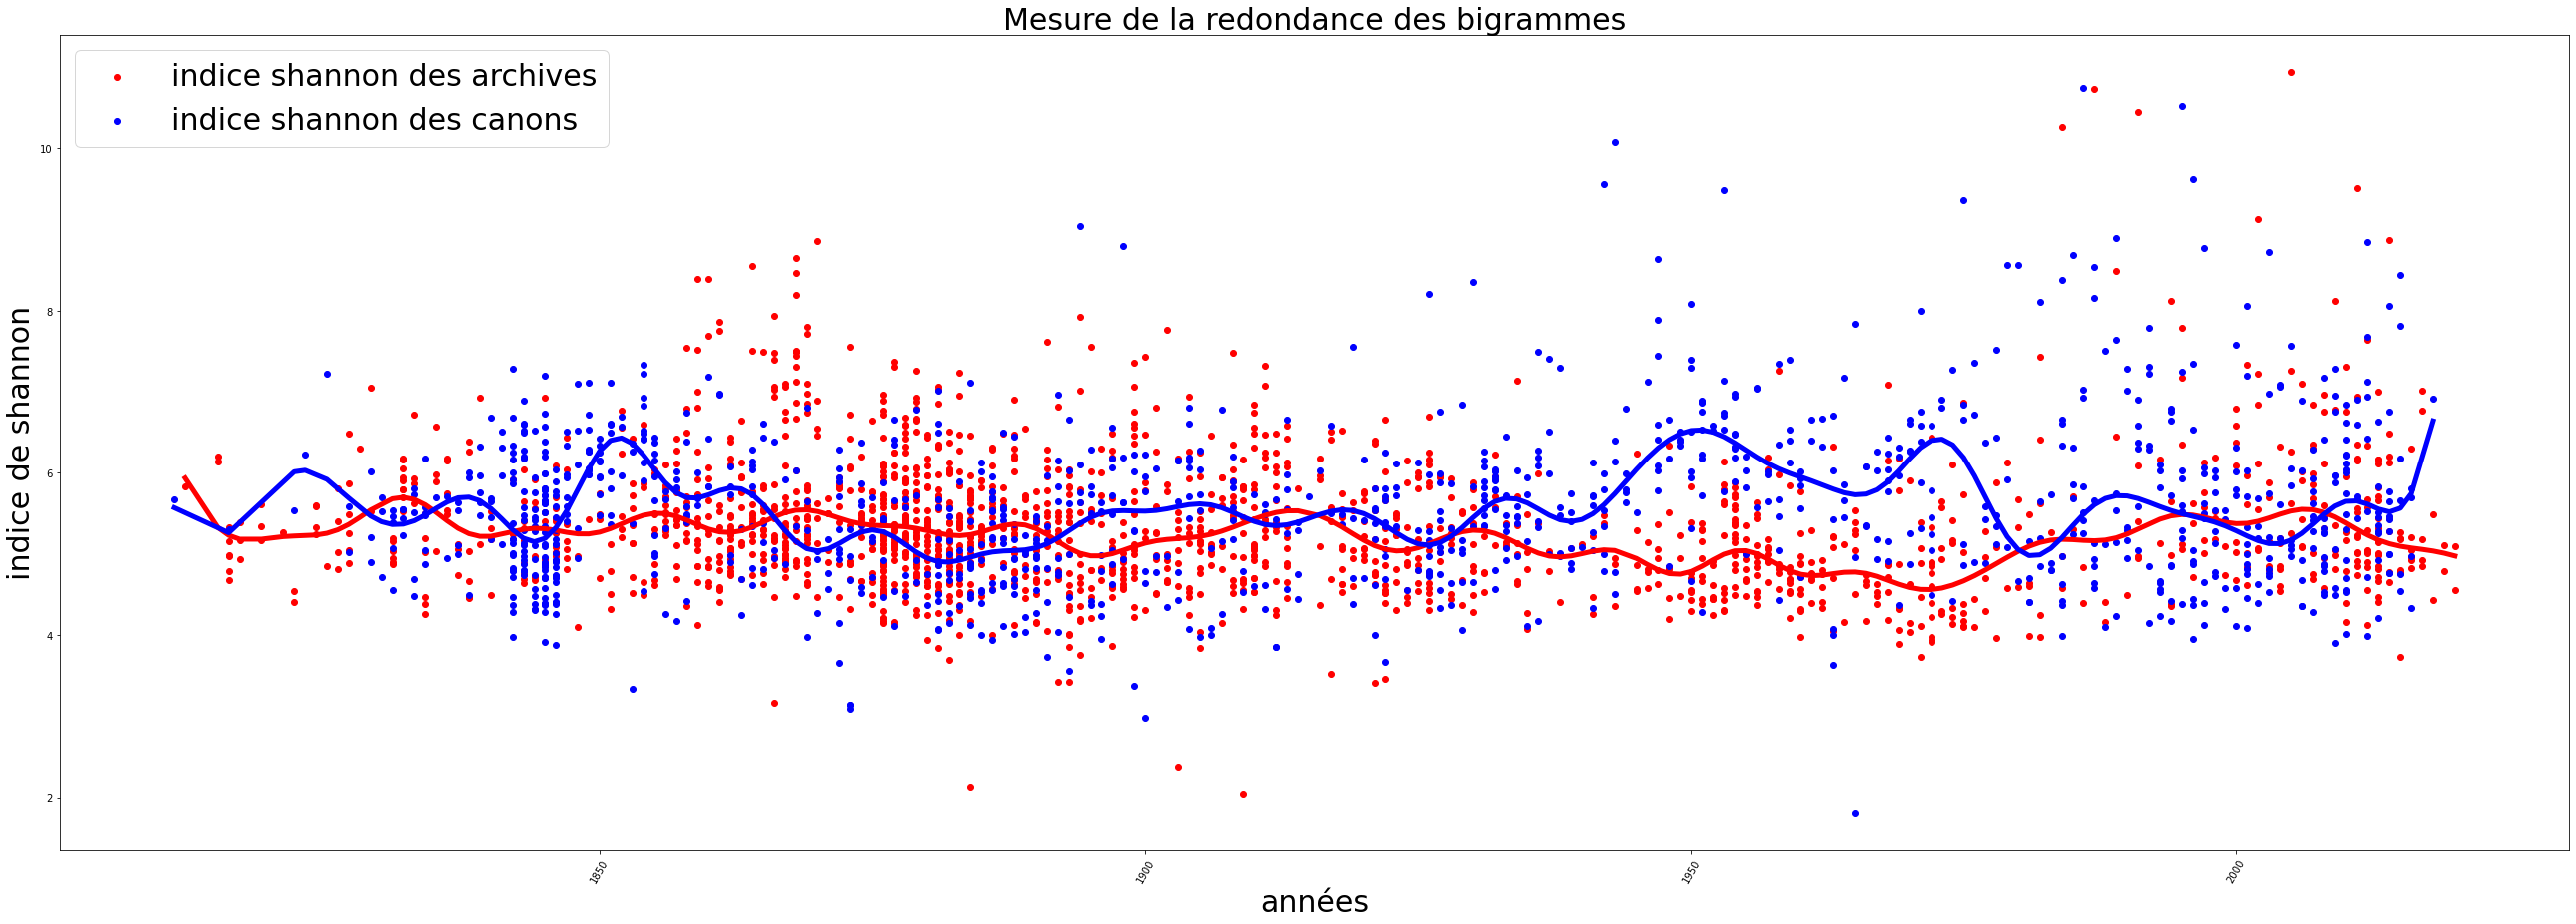

In [39]:
plt.figure(figsize=(45,15))
plt.scatter(annee_arch, shannon_archive_df.mean(), label = 'indice shannon des archives',color = 'red')
plt.scatter(annee_test, shannon_canon_df.mean(), label = 'indice shannon des canons',color='blue')
plt.plot(annee_arch, svr_poly.fit(annee_arch, data_arch).predict(annee_arch),color = 'red', linewidth=5)
plt.plot(annee_test, svr_poly.fit(annee_test, data_can).predict(annee_test),color= 'blue', linewidth=5)

plt.ylabel('indice de shannon', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance des bigrammes', fontsize=30)
plt.legend(prop={'size': 30})

plt.show()

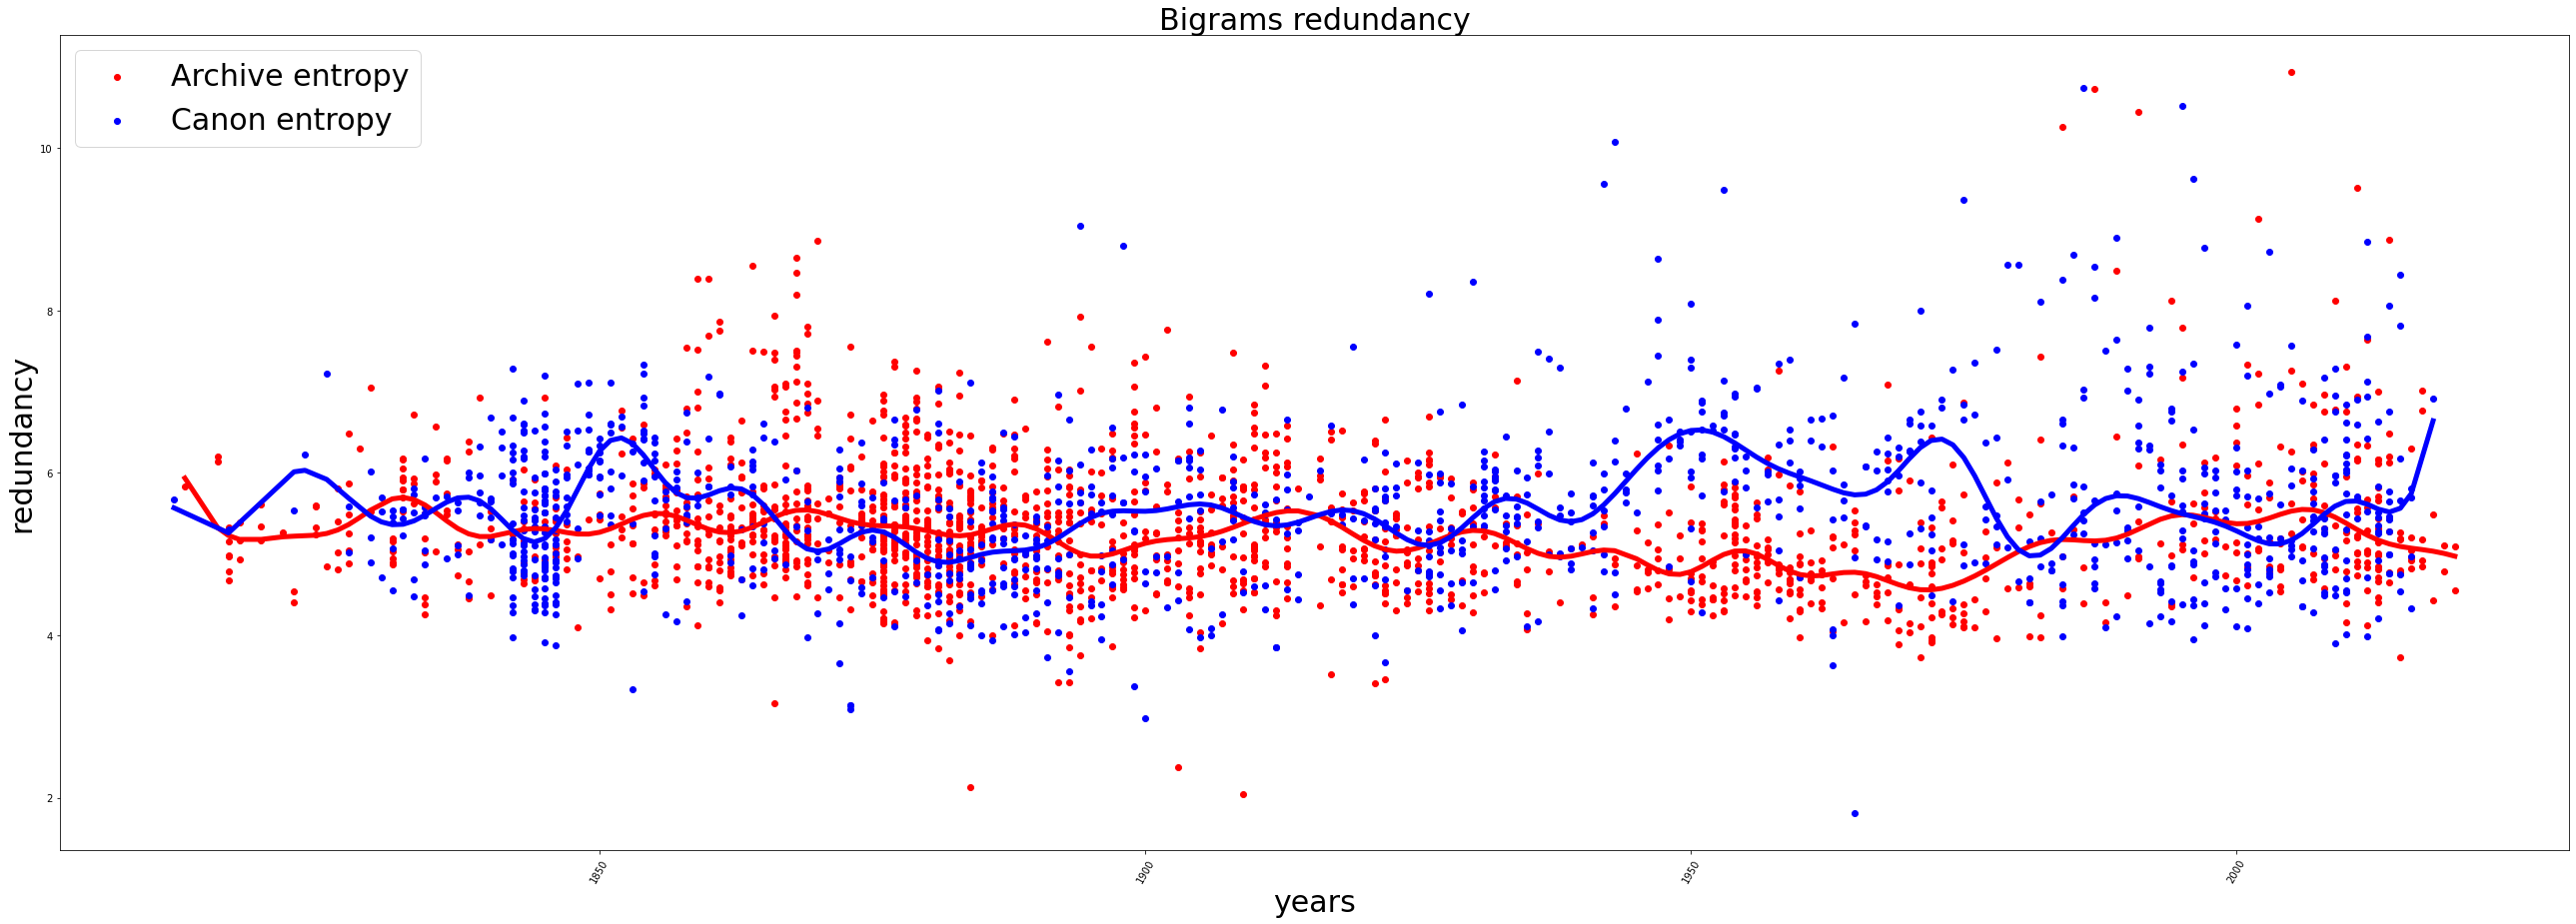

In [107]:
plt.figure(figsize=(45,15))
plt.scatter(annee_arch, shannon_archive_df.mean(), label = 'Archive entropy',color = 'red')
plt.scatter(annee_test, shannon_canon_df.mean(), label = 'Canon entropy',color='blue')
plt.plot(annee_arch, svr_poly.fit(annee_arch, data_arch).predict(annee_arch),color = 'red', linewidth=5)
plt.plot(annee_test, svr_poly.fit(annee_test, data_can).predict(annee_test),color= 'blue', linewidth=5)

plt.ylabel('redundancy', fontsize=30)
plt.xlabel('years', fontsize=30)
plt.xticks(rotation=60)

plt.title('Bigrams redundancy', fontsize=30)
plt.legend(prop={'size': 30})

plt.show()

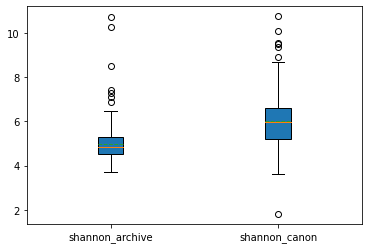

In [325]:
fig, ax = plt.subplots()
columns = [shannon_archive_df.mean()[1340:1617], shannon_canon_df.mean()[709:943]]
ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
plt.xticks([1, 2], ["shannon_archive", "shannon_canon"])
plt.show()

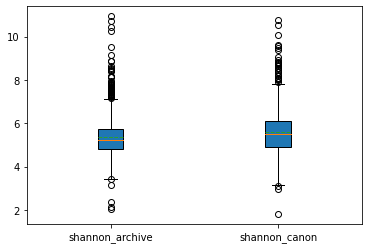

In [326]:
fig, ax = plt.subplots()
columns = [shannon_archive_df.mean(), shannon_canon_df.mean()]
ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
plt.xticks([1, 2], ["shannon_archive", "shannon_canon"])
plt.show()

In [53]:
annee_canon = ['1811', '1816', '1822', '1823', '1825', '1827', '1827', '1829', '1829', '1829', '1830', '1830', '1830', '1831', '1831', '1831', '1831', '1831', '1832', '1832', '1832', '1832', '1833', '1833', '1833', '1833', '1833', '1834', '1834', '1834', '1834', '1834', '1834', '1835', '1836', '1836', '1837', '1837', '1837', '1837', '1838', '1838', '1838', '1839', '1839', '1839', '1839', '1839', '1840', '1840', '1840', '1840', '1840', '1841', '1841', '1841', '1841', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1848', '1848', '1848', '1848', '1848', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1851', '1851', '1851', '1851', '1851', '1851', '1851', '1851', '1852', '1852', '1852', '1853', '1853', '1853', '1853', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1856', '1856', '1856', '1856', '1857', '1857', '1857', '1857', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1859', '1859', '1859', '1859', '1860', '1860', '1860', '1860', '1861', '1861', '1862', '1862', '1862', '1862', '1862', '1863', '1863', '1863', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1865', '1865', '1865', '1865', '1865', '1866', '1866', '1866', '1867', '1867', '1868', '1868', '1869', '1869', '1869', '1869', '1870', '1870', '1870', '1871', '1871', '1871', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1873', '1873', '1873', '1873', '1873', '1873', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1875', '1875', '1875', '1875', '1876', '1876', '1876', '1876', '1876', '1877', '1877', '1877', '1877', '1877', '1877', '1878', '1878', '1878', '1878', '1879', '1879', '1879', '1879', '1880', '1880', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1883', '1883', '1883', '1883', '1883', '1883', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1889', '1889', '1889', '1889', '1889', '1889', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1891', '1891', '1891', '1891', '1891', '1891', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1893', '1893', '1893', '1893', '1893', '1893', '1894', '1894', '1894', '1894', '1895', '1895', '1895', '1895', '1895', '1895', '1896', '1896', '1896', '1896', '1896', '1896', '1896', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1898', '1898', '1898', '1898', '1898', '1899', '1899', '1899', '1899', '1899', '1900', '1900', '1900', '1900', '1900', '1900', '1901', '1901', '1901', '1902', '1902', '1903', '1903', '1903', '1903', '1903', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1905', '1905', '1905', '1905', '1905', '1906', '1906', '1906', '1907', '1907', '1907', '1908', '1908', '1908', '1908', '1908', '1908', '1909', '1909', '1910', '1910', '1911', '1911', '1911', '1911', '1911', '1912', '1912', '1912', '1912', '1913', '1913', '1913', '1913', '1913', '1913', '1914', '1914', '1914', '1914', '1915', '1916', '1917', '1917', '1918', '1918', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1924', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1928', '1928', '1928', '1928', '1928', '1929', '1929', '1929', '1929', '1929', '1929', '1930', '1930', '1930', '1930', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1933', '1933', '1933', '1933', '1933', '1933', '1933', '1934', '1934', '1934', '1934', '1934', '1934', '1935', '1935', '1935', '1935', '1936', '1936', '1936', '1936', '1936', '1936', '1936', '1937', '1937', '1937', '1937', '1938', '1938', '1938', '1938', '1938', '1939', '1939', '1939', '1939', '1939', '1939', '1940', '1941', '1941', '1941', '1941', '1941', '1941', '1941', '1942', '1942', '1942', '1942', '1942', '1942', '1942', '1943', '1943', '1943', '1943', '1943', '1944', '1944', '1944', '1944', '1944', '1945', '1946', '1947', '1947', '1947', '1947', '1947', '1947', '1947', '1947', '1948', '1948', '1948', '1949', '1949', '1949', '1949', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1952', '1952', '1953', '1953', '1953', '1953', '1953', '1953', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1955', '1955', '1955', '1955', '1956', '1956', '1956', '1957', '1957', '1957', '1958', '1958', '1958', '1958', '1958', '1958', '1959', '1959', '1959', '1959', '1960', '1960', '1960', '1960', '1960', '1961', '1961', '1962', '1962', '1963', '1963', '1963', '1963', '1963', '1963', '1964', '1964', '1964', '1964', '1965', '1965', '1966', '1966', '1966', '1966', '1967', '1967', '1967', '1967', '1968', '1968', '1968', '1968', '1968', '1968', '1968', '1969', '1969', '1969', '1969', '1970', '1970', '1970', '1970', '1970', '1970', '1971', '1971', '1971', '1971', '1971', '1971', '1972', '1972', '1972', '1972', '1972', '1972', '1973', '1973', '1974', '1974', '1975', '1975', '1975', '1975', '1975', '1976', '1976', '1976', '1977', '1977', '1977', '1977', '1978', '1978', '1978', '1978', '1978', '1979', '1979', '1979', '1980', '1980', '1981', '1981', '1981', '1981', '1982', '1982', '1982', '1982', '1983', '1983', '1983', '1983', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1985', '1985', '1985', '1985', '1985', '1986', '1986', '1986', '1986', '1986', '1986', '1986', '1987', '1987', '1987', '1987', '1987', '1987', '1987', '1987', '1988', '1988', '1988', '1989', '1989', '1989', '1989', '1989', '1989', '1990', '1990', '1990', '1990', '1990', '1990', '1991', '1991', '1991', '1991', '1991', '1991', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1998', '1998', '1998', '1998', '1998', '1998', '1998', '1998', '1999', '1999', '1999', '1999', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2018']
annee_archive = ['1812', '1815', '1815', '1816', '1816', '1816', '1816', '1816', '1816', '1817', '1817', '1817', '1819', '1819', '1819', '1821', '1822', '1822', '1824', '1824', '1824', '1824', '1825', '1826', '1826', '1826', '1826', '1827', '1827', '1827', '1827', '1827', '1827', '1828', '1829', '1829', '1831', '1831', '1831', '1831', '1831', '1831', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1833', '1833', '1833', '1833', '1834', '1834', '1834', '1834', '1834', '1834', '1835', '1835', '1835', '1835', '1836', '1836', '1836', '1836', '1836', '1837', '1837', '1837', '1838', '1838', '1838', '1838', '1838', '1838', '1839', '1839', '1840', '1840', '1840', '1840', '1842', '1842', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1845', '1845', '1845', '1845', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1848', '1848', '1849', '1850', '1850', '1850', '1850', '1850', '1851', '1851', '1851', '1851', '1852', '1852', '1852', '1852', '1852', '1852', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1854', '1854', '1854', '1854', '1854', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1870', '1870', '1870', '1870', '1870', '1870', '1870', '1870', '1871', '1871', '1871', '1871', '1871', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1896', '1896', '1896', '1896', '1896', '1896', '1896', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1900', '1900', '1900', '1900', '1900', '1900', '1900', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1914', '1916', '1916', '1916', '1916', '1916', '1917', '1917', '1917', '1917', '1917', '1917', '1917', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1919', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927', '1928', '1928', '1928', '1928', '1928', '1928', '1928', '1928', '1929', '1929', '1929', '1929', '1929', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1931', '1931', '1931', '1931', '1932', '1932', '1932', '1932', '1932', '1933', '1933', '1933', '1933', '1933', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1935', '1935', '1935', '1935', '1935', '1936', '1936', '1937', '1937', '1938', '1939', '1940', '1941', '1941', '1941', '1942', '1942', '1943', '1943', '1943', '1945', '1945', '1945', '1945', '1945', '1946', '1946', '1946', '1946', '1947', '1947', '1947', '1947', '1947', '1948', '1948', '1948', '1948', '1948', '1948', '1948', '1949', '1949', '1949', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1952', '1952', '1952', '1952', '1952', '1952', '1952', '1952', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1955', '1955', '1955', '1955', '1955', '1955', '1955', '1955', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1958', '1958', '1958', '1958', '1958', '1958', '1958', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1961', '1961', '1961', '1961', '1961', '1961', '1961', '1961', '1962', '1962', '1962', '1962', '1962', '1962', '1963', '1963', '1963', '1963', '1963', '1963', '1964', '1964', '1965', '1965', '1965', '1965', '1965', '1965', '1966', '1966', '1966', '1966', '1967', '1967', '1967', '1967', '1968', '1968', '1968', '1968', '1968', '1968', '1968', '1969', '1969', '1969', '1969', '1969', '1969', '1969', '1970', '1970', '1970', '1970', '1971', '1971', '1971', '1971', '1971', '1971', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1973', '1973', '1973', '1973', '1973', '1973', '1974', '1974', '1974', '1974', '1974', '1974', '1974', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1976', '1976', '1977', '1977', '1977', '1977', '1978', '1978', '1978', '1979', '1979', '1980', '1980', '1980', '1981', '1981', '1981', '1981', '1982', '1982', '1982', '1982', '1982', '1983', '1984', '1984', '1984', '1985', '1985', '1986', '1986', '1987', '1988', '1988', '1989', '1989', '1990', '1991', '1991', '1991', '1991', '1991', '1993', '1993', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1997', '1997', '1997', '1997', '1997', '1998', '1998', '1998', '1998', '1999', '1999', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2009', '2009', '2009', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2019', '2019', '2020', '2020']

In [54]:
data_can_test = type_token_canon_df.mean().to_numpy()
data_can = data_can_test[np.logical_not(np.isnan(data_can_test))]

In [55]:
data_can = list(data_can)
data_can = clear_data(data_can)
data_can = np.array(data_can)
data_can

array([0.41958084, 0.39137931, 0.4011194 , ..., 0.39621622, 0.4215    ,
       0.411875  ])

In [56]:
data_can.reshape(-1, 1)

array([[0.41958084],
       [0.39137931],
       [0.4011194 ],
       ...,
       [0.39621622],
       [0.4215    ],
       [0.411875  ]])

In [57]:
data_arch_test = type_token_archive_df.mean().to_numpy()
data_arch = data_arch_test[np.logical_not(np.isnan(data_arch_test))]

In [58]:
#issues :
#archive
#1884_Gouraud-Julie_La-petite-maîtresse-de-maison
#1903_Leblanc-Maurice_Un-gentleman
#1909_Dhanys-Marcel_La-fille-de-Racine
#canon
#1965_Le-Clezio-Jean-Marie-Gustave_La-fievre

In [59]:
for x in range(0, len(annee_archive)):
    if annee_archive[x]=="1990":
        print(x)

1617


In [60]:
data_arch = list(data_arch)
data_arch = clear_data(data_arch)
data_arch = np.array(data_arch)
data_arch

array([0.36436364, 0.384     , 0.38935484, ..., 0.40897059, 0.443     ,
       0.4275    ])

In [61]:
data_arch.reshape(-1, 1)

array([[0.36436364],
       [0.384     ],
       [0.38935484],
       ...,
       [0.40897059],
       [0.443     ],
       [0.4275    ]])

In [62]:
annee_test = np.array(annee_canon).reshape(-1, 1)
annee_test = annee_test.astype('int32')

In [63]:
annee_arch = np.array(annee_archive).reshape(-1, 1)
annee_arch = annee_arch.astype('int32')

In [76]:
svr_poly = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=.01)
#SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
#SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [77]:
len(annee_test)

1153

In [78]:
len(type_token_canon_df.mean())

1153

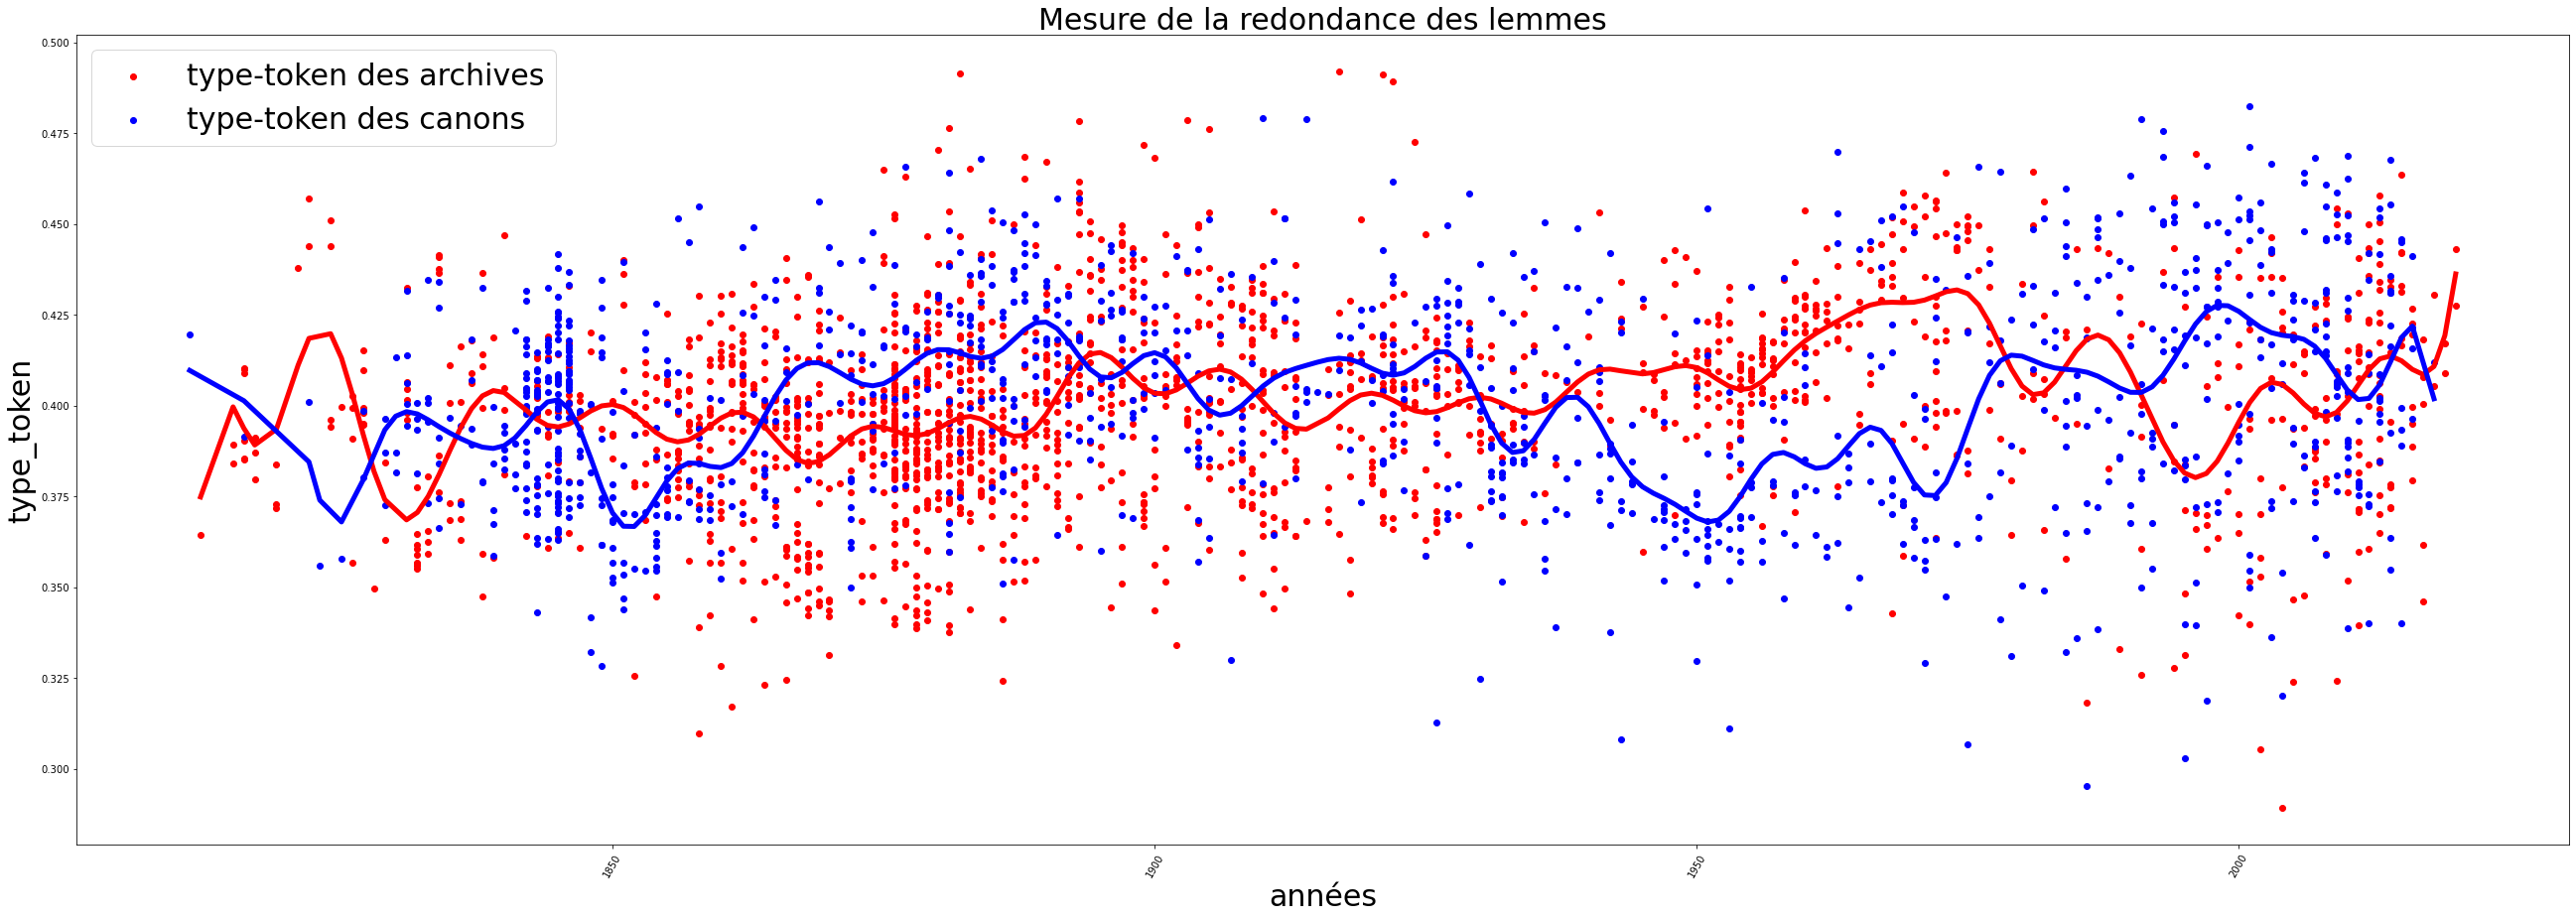

In [79]:
plt.figure(figsize=(45,15))
plt.scatter(annee_arch, type_token_archive_df.mean(), label = 'type-token des archives',color = 'red')
plt.scatter(annee_test, type_token_canon_df.mean(), label = 'type-token des canons',color='blue')
plt.plot(annee_arch, svr_poly.fit(annee_arch, data_arch).predict(annee_arch), color = 'red', linewidth=5)
plt.plot(annee_test, svr_poly.fit(annee_test, data_can).predict(annee_test), color = 'blue', linewidth=5)

plt.ylabel('type_token', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance des lemmes', fontsize=30)
plt.legend(prop={'size': 30})

plt.show()

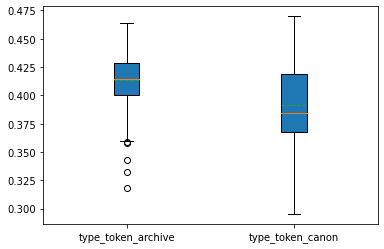

In [318]:
fig, ax = plt.subplots()
columns = [type_token_archive_df.mean()[1340:1617], type_token_canon_df.mean()[709:943]]
ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
plt.xticks([1, 2], ["type_token_archive", "type_token_canon"])
plt.show()

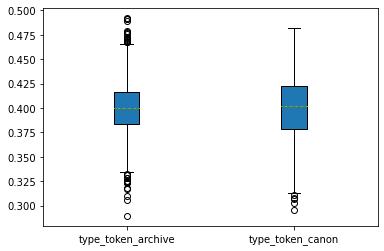

In [327]:
fig, ax = plt.subplots()
columns = [type_token_archive_df.mean(), type_token_canon_df.mean()]
ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
plt.xticks([1, 2], ["type_token_archive", "type_token_canon"])
plt.show()